In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
df = pd.read_csv('2017_APR_Data_Sharing_File_20170511.csv')


In [3]:
df = df.rename(columns={'SCL_NAME': 'school_name',
                        'SCL_DIV_16': 'NCAA_division',
                        'D1_FB_CONF_16': 'football_conference',
                        'SCL_SUB_16': 'Subdivision',
                        'APR_RATE_2016_1000': 'APR_2016',
                        'APR_RATE_2015_1000': 'APR_2015',
                        'APR_RATE_2014_1000': 'APR_2014',
                        'APR_RATE_2013_1000': 'APR_2013',
                        'APR_RATE_2012_1000': 'APR_2012',
                        'APR_RATE_2011_1000': 'APR_2011',
                        'APR_RATE_2010_1000': 'APR_2010',
                        'APR_RATE_2009_1000': 'APR_2009',
                        'APR_RATE_2008_1000': 'APR_2008',
                        'APR_RATE_2007_1000': 'APR_2007',
                        'APR_RATE_2006_1000': 'APR_2006',
                        'APR_RATE_2005_1000': 'APR_2005',
                        'APR_RATE_2004_1000': 'APR_2004'})

In [4]:
df['APR_change_2015_2016'] = df['APR_2016'] - df['APR_2015']
df['APR_change_2014_2015'] = df['APR_2015'] - df['APR_2014']
df['APR_change_2013_2014'] = df['APR_2014'] - df['APR_2013']
df['APR_change_2012_2013'] = df['APR_2013'] - df['APR_2012']
df['APR_change_2011_2012'] = df['APR_2012'] - df['APR_2011']
df['APR_change_2010_2011'] = df['APR_2011'] - df['APR_2010']
df['APR_change_2009_2010'] = df['APR_2010'] - df['APR_2009']
df['APR_change_2008_2009'] = df['APR_2009'] - df['APR_2008']
df['APR_change_2007_2008'] = df['APR_2008'] - df['APR_2007']
df['APR_change_2006_2007'] = df['APR_2007'] - df['APR_2006']
df['APR_change_2005_2006'] = df['APR_2006'] - df['APR_2005']
df['APR_change_2004_2005'] = df['APR_2005'] - df['APR_2004']
df['APR_change_2004_2016'] = df['APR_2016'] - df['APR_2004']

In [5]:
#df.info()

In [6]:
df2 = df[['school_name', 'SPORT_NAME', 'NCAA_division', 'Subdivision', 
       'football_conference', 'APR_2004', 'APR_2005', 'APR_2006',
       'APR_2007', 'APR_2008', 'APR_2009', 'APR_2010', 'APR_2011',
       'APR_2012', 'APR_2013', 'APR_2014', 'APR_2015', 'APR_2016',
       'APR_change_2004_2016']].dropna()

# "Student Athletes" or just athletes who have to go to class?
Academic performance of student athletes in college has been a topic of much discussion in recent years, making many question student athletes are as much "student" as "athlete."  The controversy is particularly centered on football and mens' basketball, as some consider these National Collegiate Athletic Association (NCAA) programs to be serve as minor league systems for professional athletics.  This dataset was downloaded from the NCAA website includes Academic Progress Rate (APR) for the different NCAA athletic programs.  APR is a measure of how students in an athletic program are staying enrolled and progressing toward graduation.  This is calculated by taking the number of students who are on target (a students who stays enrolled or is on track to graduate, but not both, is counted as one-half), dividing by the total number of students on that team, and then multiplying by 1000.  If all students on a team are retained by the school and have passed enough classes to be on target for on-time graduation, the team will receive a perfect APR of 1000.

The mean APR for the most recent year (2016) was 982.0, compared to a mean of 961.8 in 2004.  2016 shows less variation in the data than 2004, as the standard deviation in 2016 was 26.5, compared to 42.6 in 2004.  The minimum APR score in any year was 380 by Southern University's mens' basketball program in 2010, while several programs have acheived an APR of 1000 every year.  The number of sports programs has increased greatly since 2004, from 4,636 to 5,991.

In [7]:
df2.describe()

,NCAA_division,Subdivision,APR_2004,APR_2005,APR_2006,APR_2007,APR_2008,APR_2009,APR_2010,APR_2011,APR_2012,APR_2013,APR_2014,APR_2015,APR_2016,APR_change_2004_2016
count,3336.0,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.00000,3336.000000,3336.000000
mean,1.0,1.425060,960.658573,960.226319,961.315348,964.757194,971.750000,972.550360,972.645683,972.596523,975.515588,979.011091,981.339928,981.91217,982.498501,21.839928
std,0.0,0.494426,43.896437,43.415044,42.629263,39.181687,35.757594,36.259847,43.838012,41.705446,35.709897,32.013877,28.015955,26.67214,25.567701,44.952831
min,1.0,1.000000,611.000000,600.000000,643.000000,615.000000,708.000000,727.000000,380.000000,442.000000,472.000000,530.000000,714.000000,690.00000,611.000000,-306.000000
25%,1.0,1.000000,939.000000,940.000000,941.000000,944.000000,957.000000,958.000000,960.000000,958.000000,962.000000,968.000000,970.000000,972.00000,972.000000,0.000000
50%,1.0,1.000000,972.000000,971.000000,971.000000,975.000000,982.000000,982.000000,984.000000,984.000000,986.000000,990.000000,1000.000000,993.00000,1000.000000,14.000000
75%,1.0,2.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,42.000000
max,1.0,2.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,353.000000


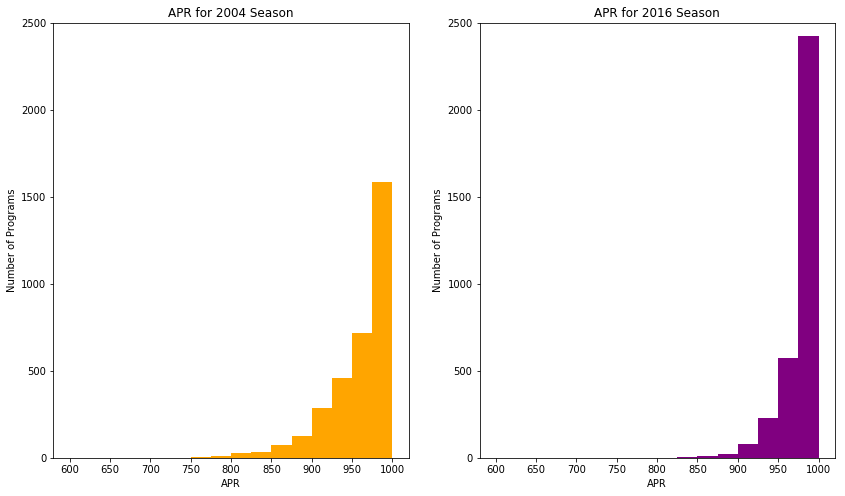

In [8]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(df2['APR_2004'], bins=[600,625,650,675,700,725,750,775,800,825,850,875,900,925,950,975,1000], color='orange')
plt.ylim([0, 2500])
plt.title('APR for 2004 Season')
plt.ylabel('Number of Programs')
plt.xlabel('APR')

plt.subplot(1, 2, 2)
plt.hist(df2['APR_2016'], bins=[600,625,650,675,700,725,750,775,800,825,850,875,900,925,950,975,1000], color='purple')
plt.ylim([0, 2500])
plt.title('APR for 2016 Season')
plt.ylabel('Number of Programs')
plt.xlabel('APR')
plt.show()

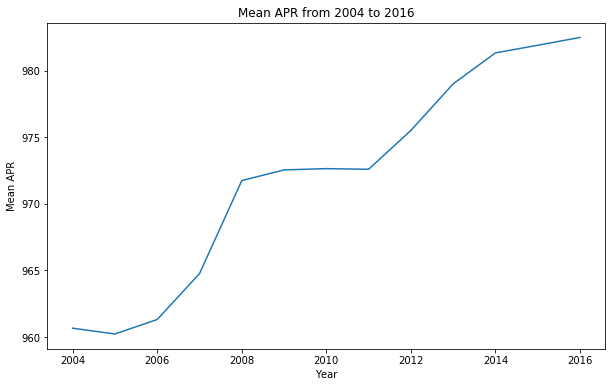

In [9]:
plt.figure(figsize=(10,6))
aprs = df2.mean()
aprs = aprs.rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016})
aprs.iloc[2:15].plot()
plt.title('Mean APR from 2004 to 2016')
plt.xlabel('Year')
plt.ylabel('Mean APR')
plt.show()

# Making the Goal
At first glance, it appears that performance is improving among athletes in the classroom.  However, most programs were already performing well according to their APR's.  It is widely know that there is often a wide disparity in academic performance among athletes in different sports.  

## How do APR's for football compare to other sports?
Academic performance for football is generally lower than other sports, with mean APR's ranging from 930.2 to 965.6. Almost all other sports had higher mean APR's in every year.  The exceptions were men's basketball in 2004-2009 and 2015 and women's bowling for 2005, 2007, 2009-2011, 2013-2014, and 2016.  From 2004 to 2016, the APR for football has increased 33.7 points, which was greater than 30 of the other 33 sports over the same time period.

In [10]:
df_sport = df2.groupby(['SPORT_NAME']).mean().reset_index()
df_sport

,SPORT_NAME,NCAA_division,Subdivision,APR_2004,APR_2005,APR_2006,APR_2007,APR_2008,APR_2009,APR_2010,APR_2011,APR_2012,APR_2013,APR_2014,APR_2015,APR_2016,APR_change_2004_2016
0,Baseball,1.0,1.437811,932.000000,936.935323,942.144279,947.756219,963.800995,962.179104,964.845771,962.194030,964.716418,970.368159,973.577114,970.915423,975.124378,43.124378
1,Football,1.0,1.462882,930.174672,930.593886,933.034934,941.013100,947.069869,947.528384,944.375546,946.445415,951.668122,958.379913,962.580786,965.554585,963.860262,33.685590
2,Men's Basketball,1.0,1.462500,925.725000,926.558333,925.408333,932.916667,945.916667,946.725000,951.470833,948.041667,956.533333,965.050000,963.879167,964.162500,967.054167,41.329167
3,Men's Cross Country,1.0,1.503597,966.071942,961.517986,971.935252,967.611511,974.352518,973.503597,976.762590,974.129496,971.712230,978.805755,979.892086,977.050360,981.251799,15.179856
4,Men's Fencing,1.0,1.545455,972.545455,982.454545,978.272727,978.090909,979.000000,998.636364,960.090909,982.636364,991.272727,990.363636,987.000000,988.545455,977.454545,4.909091
5,Men's Golf,1.0,1.361111,964.083333,964.266667,960.455556,963.972222,971.755556,981.066667,977.538889,973.933333,981.833333,983.844444,988.544444,985.716667,982.794444,18.711111
6,Men's Gymnastics,1.0,1.000000,973.000000,981.083333,961.166667,983.833333,990.750000,973.666667,981.666667,977.000000,979.750000,993.333333,991.833333,993.416667,985.250000,12.250000
7,Men's Ice Hockey,1.0,1.461538,979.076923,979.615385,976.230769,976.076923,984.461538,984.884615,989.692308,986.961538,989.884615,985.115385,990.576923,992.500000,983.653846,4.576923
8,Men's Lacrosse,1.0,1.566667,972.633333,973.866667,980.366667,982.600000,980.800000,979.933333,976.200000,975.366667,980.366667,981.500000,984.500000,987.500000,986.633333,14.000000
9,Men's Skiing,1.0,1.333333,962.166667,960.833333,963.333333,981.000000,961.500000,972.333333,981.833333,990.666667,977.666667,992.833333,988.500000,981.500000,992.000000,29.833333


In [11]:
df3 = df[df['SPORT_NAME'] != 'Football']
df_not_fb = df3[['school_name','SPORT_NAME',
       'football_conference', 'APR_2004', 'APR_2005', 
       'APR_2006','APR_2007', 'APR_2008', 'APR_2009',
       'APR_2010', 'APR_2011', 'APR_2012', 'APR_2013',
       'APR_2014','APR_2015', 'APR_2016', 'ELIG_RATE_2016',
       'RET_RATE_2016', 'NUM_OF_ATHLETES_2016',
       ]]

In [12]:
df4 = df[df['SPORT_NAME'] == 'Football']
df_fb = df4[['school_name','SPORT_NAME','NCAA_division', 'Subdivision', 
       'football_conference', 'APR_2004', 'APR_2005', 
       'APR_2006','APR_2007', 'APR_2008', 'APR_2009',
       'APR_2010', 'APR_2011', 'APR_2012', 'APR_2013',
       'APR_2014','APR_2015', 'APR_2016', 'ELIG_RATE_2016',
       'RET_RATE_2016', 'NUM_OF_ATHLETES_2016',
       ]]

In [13]:
df5 = df[df['SPORT_NAME'] == 'Men\'s Golf']
df_golf = df5[['school_name','SPORT_NAME','NCAA_division', 'Subdivision', 
       'football_conference', 'APR_2004', 'APR_2005', 
       'APR_2006','APR_2007', 'APR_2008', 'APR_2009',
       'APR_2010', 'APR_2011', 'APR_2012', 'APR_2013',
       'APR_2014','APR_2015', 'APR_2016', 'ELIG_RATE_2016',
       'RET_RATE_2016', 'NUM_OF_ATHLETES_2016',
       ]]

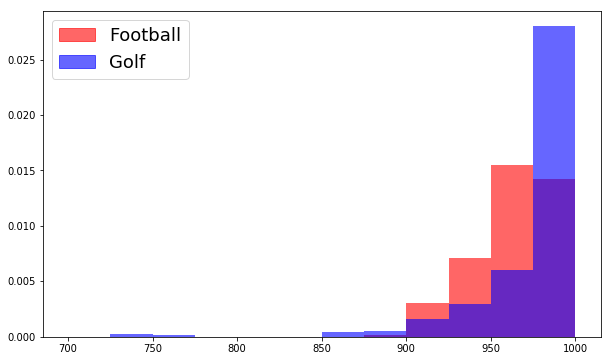

In [14]:
plt.figure(figsize=(10,6))
aa = df_fb['APR_2016'].dropna()
bb = df_golf['APR_2016'].dropna()
plt.hist(aa, bins=[700,725,750,775,800,825,850,875,900,925,950,975,1000], density=True, color='red', alpha=.6)
plt.hist(bb, bins=[700,725,750,775,800,825,850,875,900,925,950,975,1000], density=True, color='blue', alpha=.6)
red_patch = mpatches.Patch(color='red', alpha=.6, label='Football')
blue_patch = mpatches.Patch(color='b', alpha=.6, label='Golf')
plt.legend(handles=[red_patch, blue_patch], fontsize=18)
plt.show()

In [29]:
print(ttest_ind(df_golf['APR_2016'].dropna(), df_fb['APR_2016'].dropna(), equal_var=False))

Ttest_indResult(statistic=6.534025787640996, pvalue=1.5827610400123288e-10)


### Football versus Men's Golf
Let's compare football to another mens' sport that is fairly average for academic performance. In the twelve years preceding 2016, football programs increased their mean APR from 930.2 to 963.9, an increase of 33.7 points. Over the same time period, men's golf increased its mean APR from 964.1 to 982.8, which is an increase of 18.7 points.  APR's for football are lower overall than golf, but football programs had close the gap in APR somewhat (mostly from 2004 to 2007, as seen on the line plot below).  An extremely low p-value between golf and football APR's in 2016 shows that there is a significant difference between the two groups.

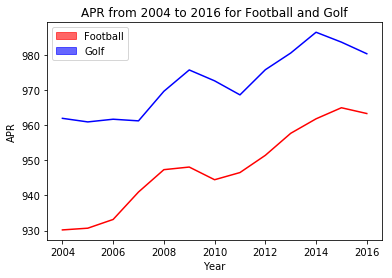

In [15]:
df_fbagg = df_fb.mean().reset_index()
df_gagg = df_golf.mean().reset_index()
gfbarray = np.array([df_fbagg.iloc[2:15, 1], df_gagg.iloc[2:15, 1]])
df6 = pd.DataFrame(gfbarray)
df_golf_fb = df6.transpose()
df_golf_fb = df_golf_fb.rename(index={0: 2004, 1: 2005, 2: 2006, 3: 2007, 4: 2008, 5: 2009,
                         6: 2010, 7: 2011, 8: 2012, 9: 2013, 10: 2014, 11: 2015, 12: 2016})
fig, ax = plt.subplots()
ax.set_prop_cycle(color=['r', 'b'])
plt.plot(df_golf_fb)
plt.title('APR from 2004 to 2016 for Football and Golf')
plt.xlabel('Year')
plt.ylabel('APR')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [17]:
df_conf = df2.groupby(['football_conference']).mean().reset_index()

In [18]:
df_school = df.groupby(['school_name']).mean().reset_index()
#df_school[['school_name', 'APR_change_2004_2016', 'APR_2004']].sort_values(by='APR_change_2004_2016', ascending=False)

In [19]:
acc = df2[df2['football_conference'] == 'Atlantic Coast Conference']
big12 = df2[df2['football_conference'] == 'Big 12 Conference']
big10 = df2[df2['football_conference'] == 'Big Ten Conference']
pac12 = df2[df2['football_conference'] == 'Pac-12 Conference']
sec = df2[df2['football_conference'] == 'Southeastern Conference']

pow5 = [acc, big12, big10, pac12, sec]
powe5 = pd.concat(pow5)
power5 = powe5.groupby(['school_name']).mean().reset_index()

#power5[['school_name', 'APR_change_2004_2016', 'APR_2004']].sort_values(by='APR_change_2004_2016', ascending=False)

In [20]:
notpow5 = df2[(df2['football_conference'] != 'Atlantic Coast Conference') 
        & (df2['football_conference'] != 'Big 12 Conference')
        & (df2['football_conference'] != 'Big Ten Conference')
        & (df2['football_conference'] != 'Pac-12 Conference')
        & (df2['football_conference'] != 'Southeastern Conference')]

## How do APR's within Power 5 conferences compare to each other and the rest of the NCAA?

In 2004, the difference in APR between the major football conferences was sizable.  The APR's ranged from 951.6 (Big 12) to 971.9 (Big Ten).  By 2016, the APR's for the major conferences were much closer, ranging from 980.8 (Big 12) to 988.3 (SEC).  In fact, excluding the Big 12, the other Power 5 conferences fall within a 3-point range (985.5 to 988.3).  Conferences whose APR's were the lowest in 2004 showed the largest increase between 2004 and 2016 in their scores.  The Big Ten had the highest mean APR in 2004, and showed the least growth in APR.  The Big 12 had the lowest mean APR in 2004, and showed the second highest growth in APR.  The SEC was the winner for most growth, which helped the conference go from second lowest mean APR to the highest by 2016.

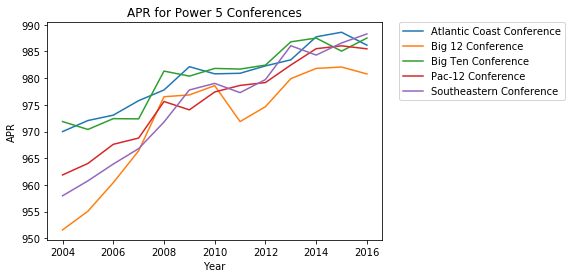

In [21]:
df_conf.iloc[1, 3:16].rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016}).plot(label='Atlantic Coast Conference')
df_conf.iloc[2, 3:16].rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016}).plot(label='Big 12 Conference')
df_conf.iloc[5, 3:16].rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016}).plot(label='Big Ten Conference')
df_conf.iloc[15, 3:16].rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016}).plot(label='Pac-12 Conference')
df_conf.iloc[18, 3:16].rename(index={'APR_2004': 2004, 'APR_2005': 2005, 'APR_2006': 2006,
                         'APR_2007': 2007, 'APR_2008': 2008, 'APR_2009': 2009,
                         'APR_2010': 2010, 'APR_2011': 2011, 'APR_2012': 2012,
                         'APR_2013': 2013, 'APR_2014': 2014, 'APR_2015': 2015,
                         'APR_2016': 2016}).plot(label='Southeastern Conference')
plt.title('APR for Power 5 Conferences')
plt.xlabel('Year')
plt.ylabel('APR')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Power 5 Conferences and Everyone Else
For the most part, football programs within Power 5 conferences had slightly higher APR's than those outside of the Power 5, but there was more variation outside of the Power 5.  The Mid-Eastern Athletic Conference had a mean APR of 957.5 and the Ivy League had a mean APR of 993.6 in 2016, which are both well outside the range of the Power 5 conferences.  The five conferences that showed the least growth and the five that showed the most growth in APR from 2004 to 2016 were not Power 5 conferences. For Power 5 Conferences the mean APR had jumped from 963.0 to 985.9 (22.9 points) from 2004 to 2016.  For non-Power 5 Conferences the jump was from 959.0 to 980.8 (21.8 points) over the same timeframe.  Perhaps the overall better performance by Power 5 Conferences could be due to more available resources or more stringent guidelines for admission to member schools.

In [22]:
df_conf[['football_conference', 'APR_2004', 'APR_2016', 'APR_change_2004_2016']].sort_values(['APR_change_2004_2016'], ascending=False)

,football_conference,APR_2004,APR_2016,APR_change_2004_2016
22,Sun Belt Conference,942.916084,979.069930,36.153846
7,Conference USA,944.630952,980.500000,35.869048
12,Mountain West Conference,943.964912,978.953216,34.988304
10,Mid-Eastern Athletic Conf.,922.645161,957.537634,34.892473
3,Big Sky Conference,943.128440,977.862385,34.733945
20,Southland Conference,939.671233,972.301370,32.630137
18,Southeastern Conference,957.961165,988.286408,30.325243
21,Southwestern Athletic Conf.,924.646465,954.626263,29.979798
2,Big 12 Conference,951.570370,980.785185,29.214815
15,Pac-12 Conference,961.869347,985.492462,23.623116


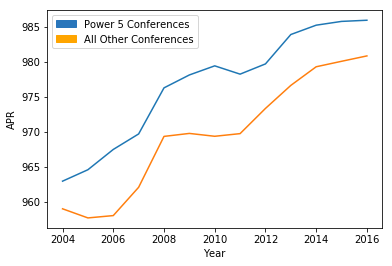

In [23]:
notpower5 = notpow5.mean().reset_index()
p5 = power5.mean().reset_index()
p5array = np.array([p5.iloc[2:15, 1], notpower5.iloc[2:15, 1]])
df7 = pd.DataFrame(p5array)
df_p5 = df7.transpose().rename(index={0: 2004, 1: 2005, 2: 2006, 3: 2007, 4: 2008, 5: 2009,
                         6: 2010, 7: 2011, 8: 2012, 9: 2013, 10: 2014, 11: 2015, 12: 2016},
                         columns={0: 'Power 5', 1: 'All Other Conferences'})
plt.plot(df_p5)
df_p5
cyan_patch = mpatches.Patch(color='xkcd:bluish', label='Power 5 Conferences')
orange_patch = mpatches.Patch(color='orange', label='All Other Conferences')
plt.legend(handles=[cyan_patch, orange_patch])
plt.ylabel('APR')
plt.xlabel('Year')
plt.show()

## What programs made significant gains in APR from 2004 to 2016?
As seen in the table below, some school have made very large gains in APR.  A small amount of schools have actually gone down in APR since 2004.  A quick glance at the data shows that the schools that made the largest gains had comparatively low APR's in 2004, which makes sense given that they had more ground to make up to get to the maximum possible score of 1000.  The University of Arkansas at Little Rock has the largest APR increase, up 91.4 points for its 2004 APR of 894.1.  Rounding out the top 5 in gains were Texas Southern University (90.3 points), University of Alabama at Birmingham (82.6), Clarion University of Pennsylvania (80.0 points), and University of Louisiana at Monroe (76.0 points).  The highest gain among Power 5 schools was Louisiana State University, showing a 65.7 point increase from its 2004 APR of 928.2.

In [24]:
df_school = df.groupby(['school_name']).mean().reset_index()
df_school[['school_name', 'APR_change_2004_2016', 'APR_2004']].sort_values(['APR_change_2004_2016'], ascending=False).dropna()

,school_name,APR_change_2004_2016,APR_2004
265,University of Arkansas at Little Rock,91.400000,894.100000
239,Texas Southern University,90.250000,867.083333
260,University of Alabama at Birmingham,82.615385,915.846154
43,Clarion University of Pennsylvania,80.000000,920.000000
296,University of Louisiana at Monroe,76.000000,910.090909
161,New Mexico State University,75.833333,915.583333
62,Delaware State University,72.000000,889.272727
2,Alabama State University,69.000000,909.384615
349,University of Texas at El Paso,66.750000,924.333333
73,Edinboro University of Pennsylvania,66.000000,934.000000


In [25]:
power5[['school_name', 'APR_change_2004_2016', 'APR_2004']].sort_values(['APR_change_2004_2016'], ascending=False).reset_index()

,index,school_name,APR_change_2004_2016,APR_2004
0,11,Louisiana State University,55.214286,937.785714
1,0,Arizona State University,46.941176,944.588235
2,2,Baylor University,46.461538,940.538462
3,32,"University of Colorado, Boulder",45.083333,941.250000
4,29,"University of Arkansas, Fayetteville",44.200000,945.200000
5,63,West Virginia University,41.928571,938.714286
6,46,"University of Nebraska, Lincoln",41.529412,947.823529
7,24,Texas Christian University,41.384615,950.615385
8,14,North Carolina State University,39.526316,944.631579
9,53,"University of Tennessee, Knoxville",38.625000,949.000000


### Different Outcomes
Overall, there is a negative correlation between schools' APR in 2004 and how much they were able to improve their APR's by 2016.  However, we see on the scatter plot below that there are some schools with similar APR's in 2004 that experienced different outcomes.  For example, Ohio State and the University of Missouri both had APR's of 961.4 in 2004, but the University of Missouri's APR increased by 17 more points than Ohio State's in the following twelve years.

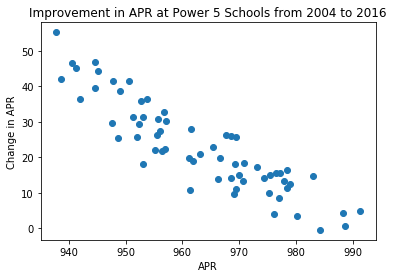

In [26]:
plt.scatter(x=power5['APR_2004'], y=power5['APR_change_2004_2016'])
plt.title('Improvement in APR at Power 5 Schools from 2004 to 2016')
plt.ylabel('Change in APR')
plt.xlabel('APR')
plt.show()

# Further Research
As shown above, there are some differences in APR growth from 2004 to 2016 between different athletic programs.  It would be interesting to conduct further research to see what factors might contribute to the differences in APR growth.  A survey consisting of a rating scale could be given to stakeholders at different school to see if significance between the variables could be found.  A new dataset could be created from that data to combine with this dataset.  I would then compare scores on the rating scale to improvement in APR at different schools and see which ones, if any, show a high correlation.

Another question I have is how successful an athletic program is correlates with its APR.  This data can be found on various websites, and could be scraped from them.  By comparing APR to winning percentage, the presence of correlation between the two could be determined.